In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Imgファイルのdifferent_shapes.png の好きな図形を長方形の枠で囲む

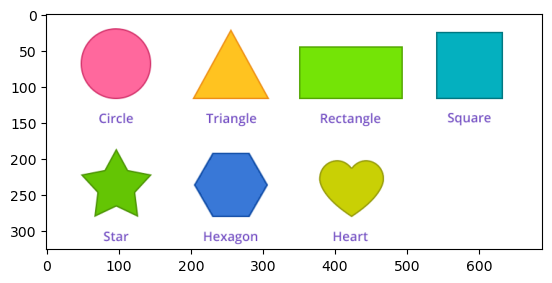

In [49]:
img_path = 'C:\\img\\different_shapes.png'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

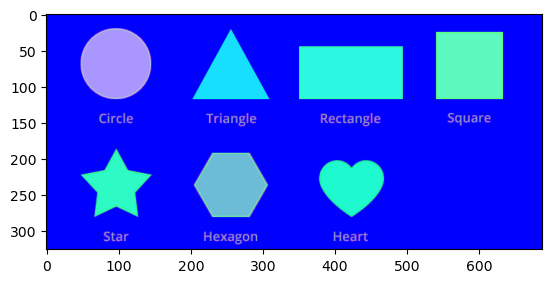

In [50]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [51]:
img_hsv[250,420]

array([ 31, 249, 208], dtype=uint8)

In [52]:
H = 5
S = 30
V = 50

In [53]:
upper = np.array([31+H, 249+S, 208+V])
lower = np.array([31-H, 249-S, 208-V])

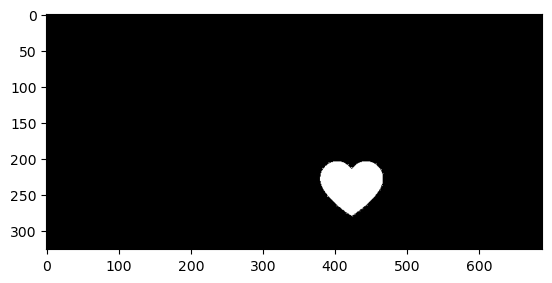

In [54]:
img_range = cv2.inRange(img_hsv, lower, upper)
plt.imshow(img_range, "gray")

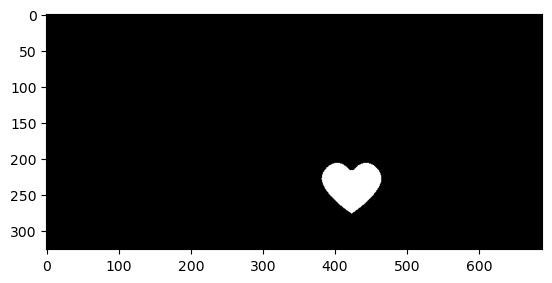

In [55]:
kernel = np.ones((5,5),np.uint8)
img_erode = cv2.erode(img_range,kernel)
img_dilate = cv2.dilate(img_erode, kernel)
plt.imshow(img_erode, "gray")

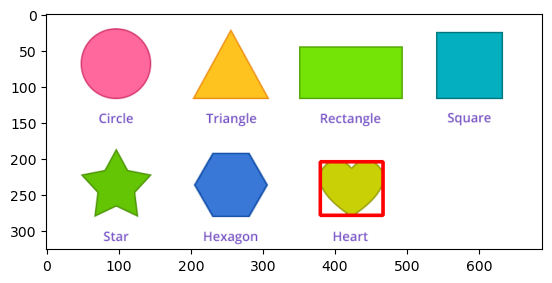

In [56]:
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    img_rect = cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img_rgb)

## 2. 複数の種類の果物が写っている画像を用意し、好きな果物の画像を長方形の枠で囲む

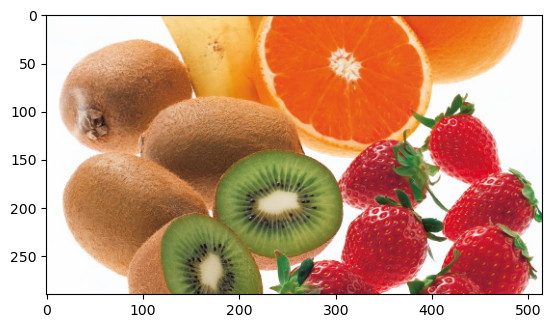

In [57]:
img_path = 'C:\\img\\fruit.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

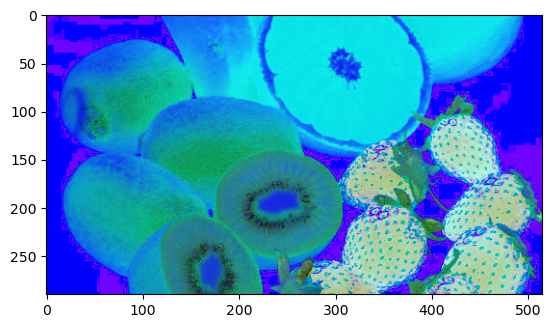

In [58]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [59]:
img_hsv[250,350]

array([178, 215, 171], dtype=uint8)

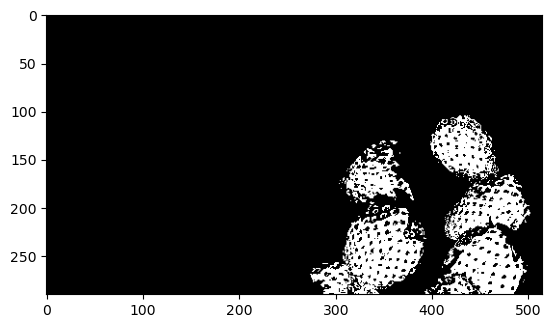

In [60]:
H = 5
S = 30
V = 50
upper = np.array([178+H, 215+S, 171+V])
lower = np.array([178-H, 215-S, 171-V])
img_range = cv2.inRange(img_hsv, lower, upper)
plt.imshow(img_range, "gray")

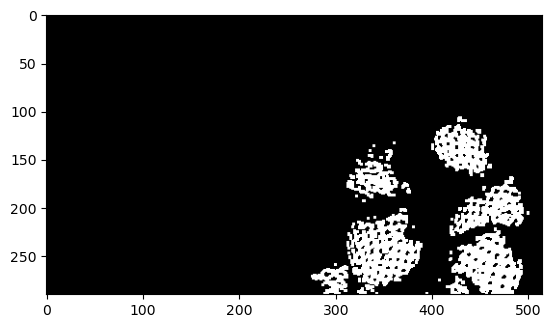

In [61]:
kernel = np.ones((3,3),np.uint8)
img_erode = cv2.erode(img_range,kernel)
img_dilate = cv2.dilate(img_erode, kernel)
plt.imshow(img_dilate, "gray")

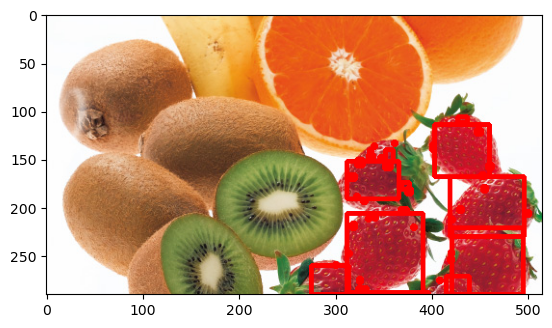

In [62]:
contours, hierarchy = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for each_contour in contours:
    x, y, w, h = cv2.boundingRect(each_contour)
    img_rect = cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(img_rgb)

## 3. cv2.RETR_EXTERNAL,   cv2.RETR_LIST,   cv2.RETR_TREE,   cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE について調べる

## 4. cv2.inRange 関数を自分作ってみる

In [105]:
def my_inrange(img,a,b,c,d,e,f):##a,bはhのlowerとupper  c,dはs   e,fはv
        h = img[:,:,0]
        s = img[:,:,1]
        v = img[:,:,2]

        mask_g = np.zeros(h.shape, dtype=np.uint8)
        mask_g[ (h>a) & (h <b) & (s>c) & (s < d) & (v>e) & (v<f ) ] = 255
        return mask_g

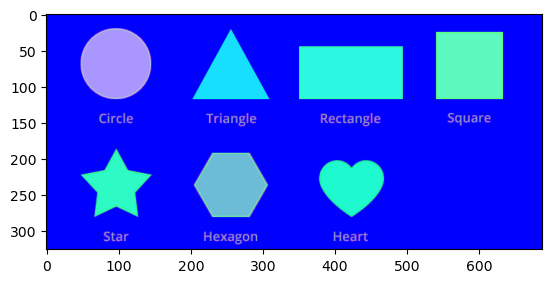

In [106]:
img_path = 'C:\\img\\different_shapes.png'
img = cv2.imread(img_path)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [107]:
my_inrange(img_hsv,20,100,200,255,50,150)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

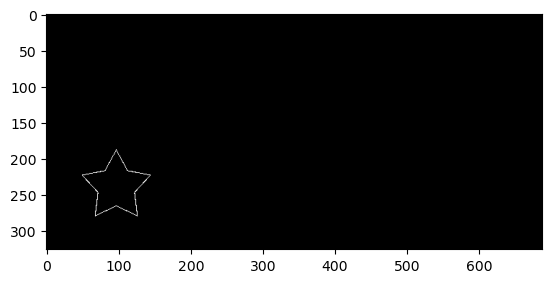

In [110]:
plt.imshow(my_inrange(img_hsv,20,100,200,255,50,150),"gray")